In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation

/home/raul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Value iteration:


\begin{equation*}
¿? : V(S_t)\longleftarrow V(S_t) + \alpha[V(S_{t+1})-V(S_t)]
\end{equation*}

\begin{equation*}
TD : V(S_t)\longleftarrow V(S_t) + \alpha[R_{t+1}+\gamma V(S_{t+1})-V(S_t)]
\end{equation*}

\begin{equation*}
Bellman : V(S_t)\longleftarrow E[R_{t+1}+\gamma V(S_{t+1})]
\end{equation*}



In [2]:
N_ROWS = 4
N_COLS = 5
GRID_WORLD = np.zeros((N_ROWS, N_COLS))

WIN_STATE = (1,4)
GRID_WORLD[WIN_STATE] = 1

LOSE_STATE = (2,3)
GRID_WORLD[LOSE_STATE] = -1

INVALID_STATE = (1,1)
GRID_WORLD[INVALID_STATE] = np.nan
INVALID_STATE = (2,1)
GRID_WORLD[INVALID_STATE] = np.nan
INVALID_STATE = (0,3)
GRID_WORLD[INVALID_STATE] = np.nan

ACTIONS = ('Up', 'Down', 'Left', 'Right')

GAMMA = .9
ALPHA = 0.1

class Agent():
    
    def __init__(self, initial_state, world_knowledge):
        self.initial_state = initial_state
        self.current_state = initial_state
        self.world_knowledge = world_knowledge.copy()
        self.next_action = None
        
        
    def __str__(self) -> str:
        return f'turti at {self.current_state} with action {self.next_action}'
    
    def choose_action(self):
        next_action = random.choice(ACTIONS)
        self.next_action = next_action
        return next_action
    

    
    def set_new_value_bellman(self, new_state, next_reward=0):
        
        next_value = self.world_knowledge[new_state]
        
        #current_value = self.world_knowledge[self.current_state]
        #updated_value = current_value + ALPHA*( next_value - current_value )
        updated_value = next_reward + GAMMA*next_value
        
        self.world_knowledge[self.current_state] = updated_value
        
        return updated_value
    
    
    def set_new_value_td(self, new_state, next_reward=0):
        
        current_value = self.world_knowledge[self.current_state]
        next_value = self.world_knowledge[new_state]
                
        updated_value = current_value + ALPHA * (next_reward + GAMMA * next_value - current_value)
        
        self.world_knowledge[self.current_state] = updated_value
        
        return updated_value
    
    
    def restart(self):
        self.current_state = self.initial_state
        self.next_action = None
    
        
    def move(self, next_action):
                
        if not next_action:
            new_state = self.current_state
        elif next_action == 'Up':
            new_state = (max(self.current_state[0]-1, 0), self.current_state[1])
        elif next_action == 'Down':
            new_state = (min(self.current_state[0]+1, N_ROWS-1), self.current_state[1])
        elif next_action == 'Left':
            new_state = (self.current_state[0], max(self.current_state[1]-1, 0))
        elif next_action == 'Right':
            new_state = (self.current_state[0], min(self.current_state[1]+1, N_COLS-1))
            
        # No actualice valor cuando choca contra una pared 
        if self.current_state == new_state:
            return new_state
        
        # Se queda en el mismo lugar si choca contra una obstaculo
        if np.isnan(self.world_knowledge[new_state]):
            return self.current_state
            
        self.set_new_value_td(new_state)
        
        if (new_state == WIN_STATE) or (new_state == LOSE_STATE):
            self.restart()
            return self.initial_state
            
        self.current_state = new_state
        
        return new_state

MovieWriter ffmpeg unavailable; using Pillow instead.


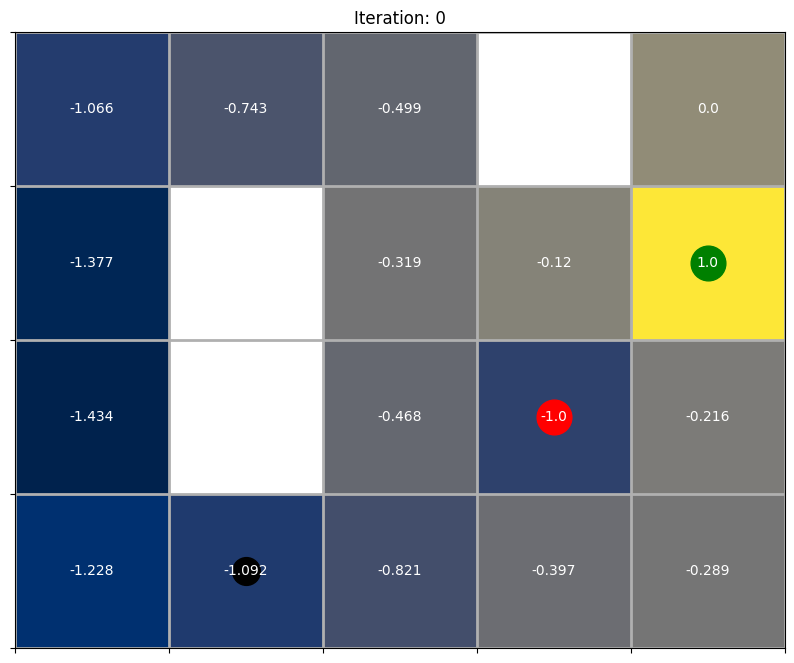

In [13]:
turti = Agent(initial_state=(2,0), world_knowledge=GRID_WORLD)

fig, ax = plt.subplots(figsize=(15, 8))

def update(ite):
    world_knowledge = turti.world_knowledge.copy()
    ax.clear()
    ax.set_title(f'Iteration: {ite}')
    ax.imshow(world_knowledge, cmap='cividis')
    
    ax.set_xticks(np.arange(-.5, N_COLS, 1))
    ax.set_yticks(np.arange(-.5, N_ROWS, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax.grid(which='both', linewidth=2)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    
    for i in range(world_knowledge.shape[0]):
        for j in range(world_knowledge.shape[1]):
            ax.text(j, i, str(round(world_knowledge[i, j], 3)), ha='center', va='center', color='white')
        
        
    ax.plot(turti.current_state[1], turti.current_state[0], 'ko', markersize=20)
    
    ax.plot(WIN_STATE[1], WIN_STATE[0], 'go', markersize=25)
    ax.plot(LOSE_STATE[1], LOSE_STATE[0], 'ro', markersize=25)
    if ite>0:
        turti.choose_action()
        turti.move(turti.next_action)
    return ax

ani = animation.FuncAnimation(fig, update, frames=range(200))
ani.save('simulations/value_iteration_v1.gif', fps=5)

In [14]:
'''
for _ in range(200):
    next_action = turti.choose_action()
    turti.move(next_action)
    
'''

'\nfor _ in range(200):\n    next_action = turti.choose_action()\n    turti.move(next_action)\n    \n'

In [15]:
print(turti.world_knowledge)

[[-1.06598799 -0.74335057 -0.49925591         nan  0.        ]
 [-1.37741203         nan -0.31942877 -0.12023288  1.        ]
 [-1.43370385         nan -0.46755211 -1.         -0.2160829 ]
 [-1.22825327 -1.09226938 -0.82115941 -0.39692011 -0.288829  ]]


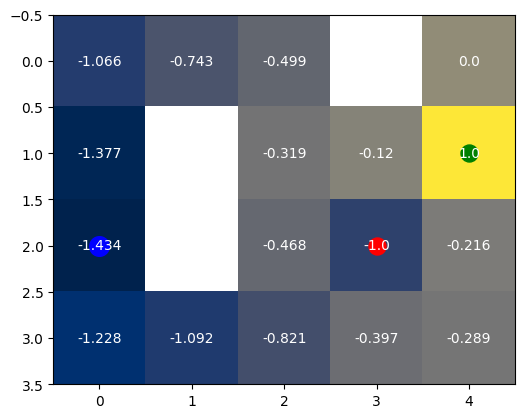

In [16]:
plt.imshow(turti.world_knowledge, cmap='cividis', norm='linear')

for i in range(turti.world_knowledge.shape[0]):
        for j in range(turti.world_knowledge.shape[1]):
            plt.text(j, i, str(round(turti.world_knowledge[i, j], 3)), 
                     ha='center', va='center', color='white')
            
plt.scatter(turti.initial_state[1], turti.initial_state[0], color='b', s=200)

plt.scatter(WIN_STATE[1], WIN_STATE[0], color='g', s=150)
plt.scatter(LOSE_STATE[1], LOSE_STATE[0], color='r', s=150)